## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  37.300695   648.273824  0.503583   5.841703  328.529501
1  18.940073   686.279131  0.450567  10.693438  309.747380
2  78.944090  1598.274189  0.395904   2.633536  637.711200
3  70.276061   943.132175  0.853214  10.245302  807.752395
4  35.872054  1186.040292  0.497655   9.579136  591.282867


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9861088	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9757699	total: 58ms	remaining: 28.9s
2:	learn: 0.9652571	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9538775	total: 58.8ms	remaining: 14.7s
4:	learn: 0.9394911	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9284745	total: 59.7ms	remaining: 9.88s
6:	learn: 0.9166163	total: 60.1ms	remaining: 8.52s
7:	learn: 0.9040776	total: 60.5ms	remaining: 7.5s
8:	learn: 0.8944266	total: 60.9ms	remaining: 6.71s
9:	learn: 0.8835253	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8732428	total: 61.9ms	remaining: 5.56s
11:	learn: 0.8609112	total: 62.3ms	remaining: 5.13s
12:	learn: 0.8497786	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8390217	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8286078	total: 63.7ms	remaining: 4.18s
15:	learn: 0.8174637	total: 64.2ms	remaining: 3.95s
16:	learn: 0.8079666	total: 64.6ms	remaining: 3.73s
17:	learn: 0.7987660	total: 65.1ms	remaining: 3.55s
18:	learn: 0.7906194	total: 65.4ms	remaining: 3

123:	learn: 0.2686990	total: 107ms	remaining: 759ms
124:	learn: 0.2663500	total: 108ms	remaining: 756ms
125:	learn: 0.2638965	total: 109ms	remaining: 753ms
126:	learn: 0.2613613	total: 109ms	remaining: 748ms
127:	learn: 0.2588872	total: 109ms	remaining: 744ms
128:	learn: 0.2562745	total: 110ms	remaining: 741ms
129:	learn: 0.2543296	total: 110ms	remaining: 738ms
130:	learn: 0.2522218	total: 111ms	remaining: 733ms
131:	learn: 0.2499959	total: 111ms	remaining: 730ms
132:	learn: 0.2479364	total: 111ms	remaining: 726ms
133:	learn: 0.2454648	total: 112ms	remaining: 723ms
134:	learn: 0.2434971	total: 112ms	remaining: 719ms
135:	learn: 0.2416870	total: 113ms	remaining: 716ms
136:	learn: 0.2397348	total: 113ms	remaining: 712ms
137:	learn: 0.2378172	total: 113ms	remaining: 709ms
138:	learn: 0.2352764	total: 114ms	remaining: 706ms
139:	learn: 0.2333301	total: 114ms	remaining: 702ms
140:	learn: 0.2310897	total: 115ms	remaining: 699ms
141:	learn: 0.2283884	total: 115ms	remaining: 696ms
142:	learn: 

304:	learn: 0.0670481	total: 185ms	remaining: 421ms
305:	learn: 0.0666630	total: 185ms	remaining: 420ms
306:	learn: 0.0662861	total: 186ms	remaining: 419ms
307:	learn: 0.0658907	total: 186ms	remaining: 418ms
308:	learn: 0.0654696	total: 186ms	remaining: 417ms
309:	learn: 0.0649826	total: 187ms	remaining: 415ms
310:	learn: 0.0646148	total: 187ms	remaining: 414ms
311:	learn: 0.0642113	total: 187ms	remaining: 413ms
312:	learn: 0.0639034	total: 188ms	remaining: 412ms
313:	learn: 0.0634270	total: 188ms	remaining: 411ms
314:	learn: 0.0629606	total: 189ms	remaining: 410ms
315:	learn: 0.0626555	total: 189ms	remaining: 409ms
316:	learn: 0.0623618	total: 190ms	remaining: 409ms
317:	learn: 0.0620666	total: 190ms	remaining: 408ms
318:	learn: 0.0616095	total: 190ms	remaining: 407ms
319:	learn: 0.0611592	total: 191ms	remaining: 406ms
320:	learn: 0.0607119	total: 191ms	remaining: 404ms
321:	learn: 0.0603976	total: 192ms	remaining: 403ms
322:	learn: 0.0601127	total: 192ms	remaining: 402ms
323:	learn: 

537:	learn: 0.0223746	total: 288ms	remaining: 248ms
538:	learn: 0.0223437	total: 289ms	remaining: 247ms
539:	learn: 0.0222396	total: 289ms	remaining: 246ms
540:	learn: 0.0222095	total: 290ms	remaining: 246ms
541:	learn: 0.0221014	total: 290ms	remaining: 245ms
542:	learn: 0.0220469	total: 290ms	remaining: 244ms
543:	learn: 0.0220114	total: 291ms	remaining: 244ms
544:	learn: 0.0219063	total: 291ms	remaining: 243ms
545:	learn: 0.0218698	total: 292ms	remaining: 243ms
546:	learn: 0.0218419	total: 292ms	remaining: 242ms
547:	learn: 0.0217396	total: 292ms	remaining: 241ms
548:	learn: 0.0217125	total: 293ms	remaining: 241ms
549:	learn: 0.0216777	total: 293ms	remaining: 240ms
550:	learn: 0.0216514	total: 294ms	remaining: 239ms
551:	learn: 0.0215520	total: 294ms	remaining: 239ms
552:	learn: 0.0215186	total: 294ms	remaining: 238ms
553:	learn: 0.0214933	total: 295ms	remaining: 237ms
554:	learn: 0.0213966	total: 295ms	remaining: 237ms
555:	learn: 0.0213659	total: 296ms	remaining: 236ms
556:	learn: 

722:	learn: 0.0127386	total: 366ms	remaining: 140ms
723:	learn: 0.0127129	total: 366ms	remaining: 140ms
724:	learn: 0.0126740	total: 367ms	remaining: 139ms
725:	learn: 0.0126424	total: 367ms	remaining: 139ms
726:	learn: 0.0125819	total: 367ms	remaining: 138ms
727:	learn: 0.0125567	total: 368ms	remaining: 137ms
728:	learn: 0.0125318	total: 368ms	remaining: 137ms
729:	learn: 0.0124941	total: 369ms	remaining: 136ms
730:	learn: 0.0124632	total: 369ms	remaining: 136ms
731:	learn: 0.0124029	total: 369ms	remaining: 135ms
732:	learn: 0.0123785	total: 370ms	remaining: 135ms
733:	learn: 0.0123420	total: 370ms	remaining: 134ms
734:	learn: 0.0123116	total: 371ms	remaining: 134ms
735:	learn: 0.0122542	total: 371ms	remaining: 133ms
736:	learn: 0.0122302	total: 372ms	remaining: 133ms
737:	learn: 0.0121725	total: 372ms	remaining: 132ms
738:	learn: 0.0121489	total: 372ms	remaining: 132ms
739:	learn: 0.0121136	total: 373ms	remaining: 131ms
740:	learn: 0.0120839	total: 373ms	remaining: 130ms
741:	learn: 

948:	learn: 0.0065474	total: 469ms	remaining: 25.2ms
949:	learn: 0.0065187	total: 470ms	remaining: 24.7ms
950:	learn: 0.0064886	total: 470ms	remaining: 24.2ms
951:	learn: 0.0064597	total: 470ms	remaining: 23.7ms
952:	learn: 0.0064436	total: 471ms	remaining: 23.2ms
953:	learn: 0.0064120	total: 471ms	remaining: 22.7ms
954:	learn: 0.0064071	total: 472ms	remaining: 22.2ms
955:	learn: 0.0063862	total: 472ms	remaining: 21.7ms
956:	learn: 0.0063704	total: 473ms	remaining: 21.2ms
957:	learn: 0.0063423	total: 473ms	remaining: 20.7ms
958:	learn: 0.0063268	total: 473ms	remaining: 20.2ms
959:	learn: 0.0063222	total: 474ms	remaining: 19.7ms
960:	learn: 0.0062914	total: 474ms	remaining: 19.2ms
961:	learn: 0.0062670	total: 475ms	remaining: 18.8ms
962:	learn: 0.0062518	total: 475ms	remaining: 18.3ms
963:	learn: 0.0062267	total: 476ms	remaining: 17.8ms
964:	learn: 0.0061967	total: 476ms	remaining: 17.3ms
965:	learn: 0.0061825	total: 476ms	remaining: 16.8ms
966:	learn: 0.0061550	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

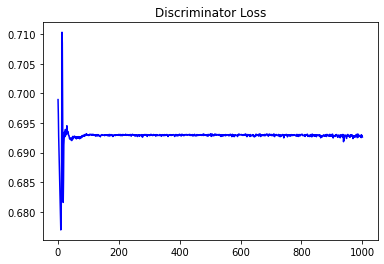

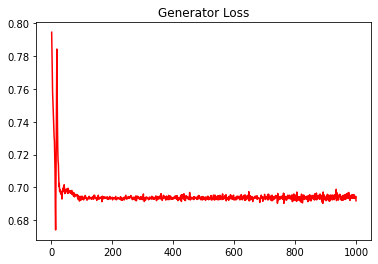

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.013421995591742548


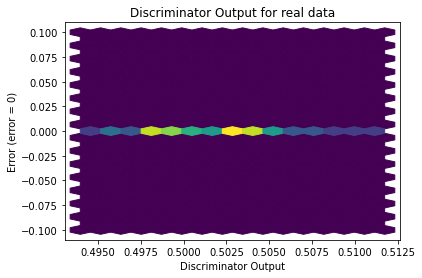

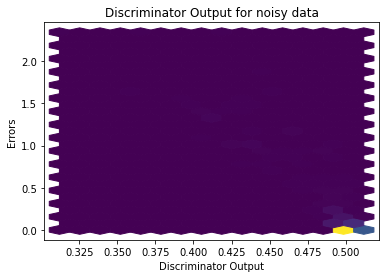

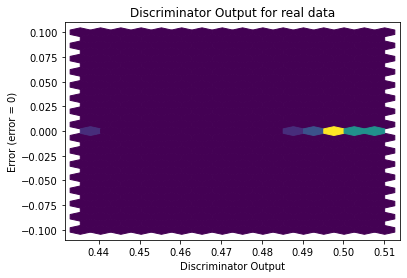

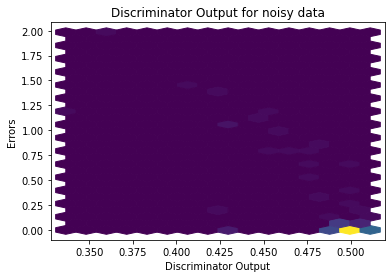

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


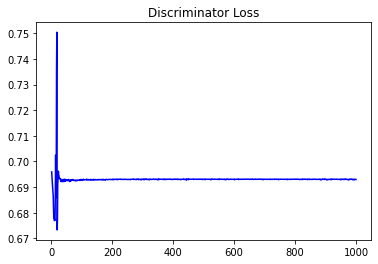

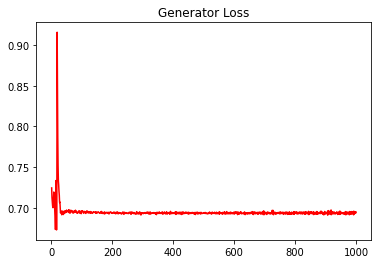

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009369275622435813


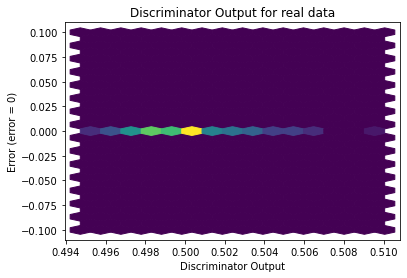

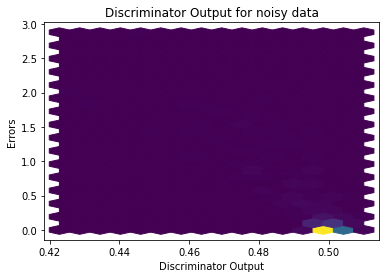

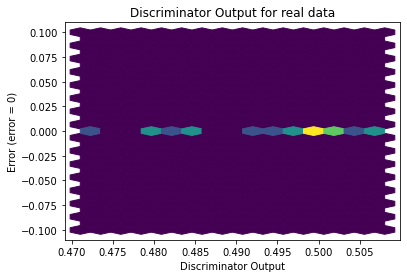

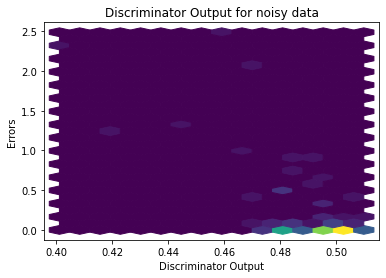

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8898]], requires_grad=True)
